In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt 
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [2]:
tweets = pd.read_csv('vfarms.csv')

In [3]:
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1260879852917440512,1260879852917440512,1589452157000,2020-05-14,06:29:17,EDT,1126761840678178816,sixteenthvenus,Ø,NaN,“i only have ugly pennies”\n“show me your ant ...,[],[],[],0,0,0,[],[],https://twitter.com/sixteenthvenus/status/1260...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1126761840678178816', 'username'...",NaN,NaN,NaN,NaN
1,1260878483799961602,1260692294870732800,1589451831000,2020-05-14,06:23:51,EDT,875727134089785351,toddcitron,Todd Alan Citron,NaN,No indoor plumbing yet? Sounds like my Momma’...,['shaniatwain'],[],[],0,0,0,[],[],https://twitter.com/ToddCitron/status/12608784...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '875727134089785351', 'username':...",NaN,NaN,NaN,NaN
2,1260868773202071554,1260839178432020480,1589449515000,2020-05-14,05:45:15,EDT,2561944748,defectinggrey,AmbrosiaCreamChapel,NaN,"“But...”, someone shouts. “... indoor farms!” ...",['botanygeek'],[],[],0,0,0,[],[],https://twitter.com/DefectingGrey/status/12608...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2561944748', 'username': 'Defect...",NaN,NaN,NaN,NaN
3,1260829270907158529,1260829270907158529,1589440097000,2020-05-14,03:08:17,EDT,821748775127552001,ganja_seeds,#Cannabis seeds worldwide,NaN,Learn how to grow weed >> http://www.howtogro...,[],"['http://www.howtogrowweed420.com/3103.html', ...",[],0,0,0,[],[],https://twitter.com/ganja_seeds/status/1260829...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '821748775127552001', 'username':...",NaN,NaN,NaN,NaN
4,1260805936748408833,1255254212243525635,1589434534000,2020-05-14,01:35:34,EDT,1027244220128608256,morty_lin,M Æ R-3,NaN,For me it's partly due to having more time to ...,['magdalenakala'],[],[],0,0,0,[],[],https://twitter.com/morty_lin/status/126080593...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1027244220128608256', 'username'...",NaN,NaN,NaN,NaN


In [4]:
tweets['date'] = pd.to_datetime(tweets['date'])

In [5]:
tweets.set_index('date', inplace=True)

In [6]:
just_tweets = tweets[['tweet']]

In [7]:
just_tweets.head()

,tweet
date,
2020-05-14,“i only have ugly pennies”\n“show me your ant ...
2020-05-14,No indoor plumbing yet? Sounds like my Momma’...
2020-05-14,"“But...”, someone shouts. “... indoor farms!” ..."
2020-05-14,Learn how to grow weed >> http://www.howtogro...
2020-05-14,For me it's partly due to having more time to ...


Commenting out this cell below. I used it at a test for the `VADER` analyzer.   
  
One thing I am trying to still understand about this is the last line of code, with the `{:-<65}`... 

In [8]:
analyzer = SentimentIntensityAnalyzer()
# for tweet in just_tweets['tweet']:
#     vs = analyzer.polarity_scores(tweet)
#     print("{:-<65} {}".format(tweet, str(vs)))

Not very pleased with how that worked out. Not really sure how it worked. Need to look into how to refine this thing.

In [9]:
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in just_tweets['tweet']]

(array([  39.,   38.,   43.,  114.,   76.,   96.,  118.,  126.,   95.,
        2124.,  106.,  424.,  409.,  496.,  495.,  412.,  657.,  513.,
         508.,  294.]),
 array([-0.9691 , -0.87134, -0.77358, -0.67582, -0.57806, -0.4803 ,
        -0.38254, -0.28478, -0.18702, -0.08926,  0.0085 ,  0.10626,
         0.20402,  0.30178,  0.39954,  0.4973 ,  0.59506,  0.69282,
         0.79058,  0.88834,  0.9861 ]),
 <a list of 20 Patch objects>)

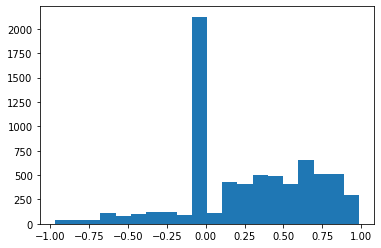

In [10]:
plt.hist(scores, bins=20)

My original hypothesis was that people who are talking about indoor farming were excited about it, with very few being against it. It is a niche. Not much reason to talk about it if you're not enthusiastic about it.

In [11]:
just_tweets['tweet'].str.contains('vertical farm', regex=False).value_counts()

False    6581
True      602
Name: tweet, dtype: int64

This tells me that this particular data set mostly doesn't hold the exact term `vertical farm`, but there are 602 that do. This is important. I could, in the end, compile a full list of tweets that are exactly related to the topic.

In [12]:
just_tweets['sentiment'] = scores

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


positive sentiment: compound score >= 0.05  

neutral sentiment: (compound score > -0.05) and (compound score < 0.05)  

negative sentiment: compound score <= -0.05  
  
https://github.com/cjhutto/vaderSentiment#about-the-scoring

In [13]:
# Categorizing the sentiment scores based on VADER's specifications
just_tweets['score'] = pd.cut(just_tweets.sentiment,bins=[-1,-0.051,0.049,1],labels=['negative','neutral','positive'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
just_tweets.head()

,tweet,sentiment,score
date,,,
2020-05-14,“i only have ugly pennies”\n“show me your ant ...,-0.7345,negative
2020-05-14,No indoor plumbing yet? Sounds like my Momma’...,0.8999,positive
2020-05-14,"“But...”, someone shouts. “... indoor farms!” ...",0.5093,positive
2020-05-14,Learn how to grow weed >> http://www.howtogro...,0.5994,positive
2020-05-14,For me it's partly due to having more time to ...,0.0000,neutral


In [15]:
%run -i 'mod5_functions.py'

<Figure size 432x288 with 0 Axes>

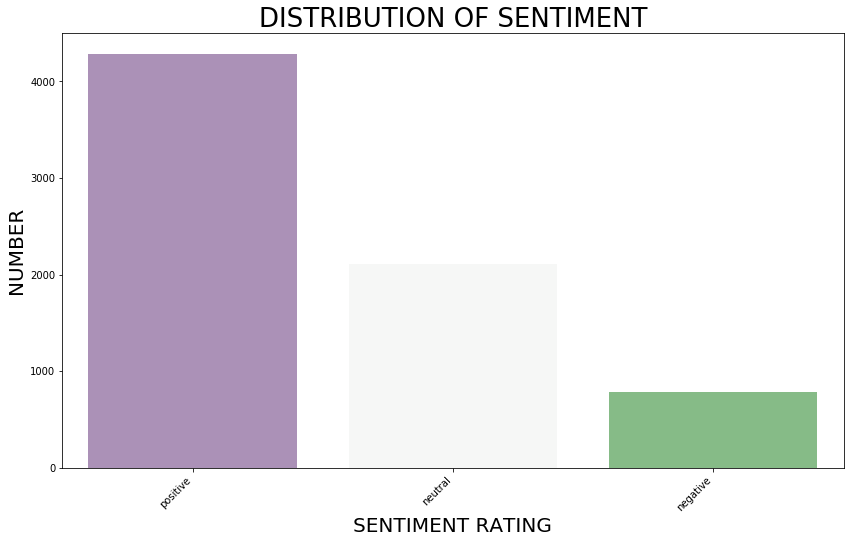

In [16]:
make_value_chart(just_tweets, 'score', 'SENTIMENT RATING', 'NUMBER', 'DISTRIBUTION OF SENTIMENT')

Going to perform CHI2

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Can run statistical tests to confirm the amounts are statistically significantly different.

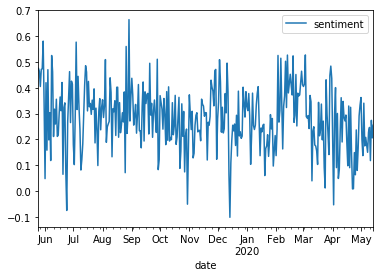

In [17]:
just_tweets.resample('D').mean().plot()

That was a good run. That particular dataset isn't long enough, doesn't go far back enough.

In [19]:
mas_twits = pd.read_csv('old_tweets.csv')

In [20]:
mas = vader_process(mas_twits)

mod5_functions.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = scores
mod5_functions.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels=['negative','neutral','positive'])


In [21]:
mas.head()

,tweet,sentiment,score
date,,,
2020-05-13,There are over 50 urban farms in the metro Atl...,0.7840,positive
2020-05-13,"Urban farms, now we're talkin'! https://twitt...",0.0000,neutral
2020-05-13,Urban agriculture of some sort...I think we’re...,0.0000,neutral
2020-05-13,Reporting in #COVID19 times has meant intervie...,0.0258,neutral
2020-05-13,Food wins out over cars in #Singapore - Nine m...,0.5719,positive


In [23]:
from wordcloud import WordCloud, STOPWORDS

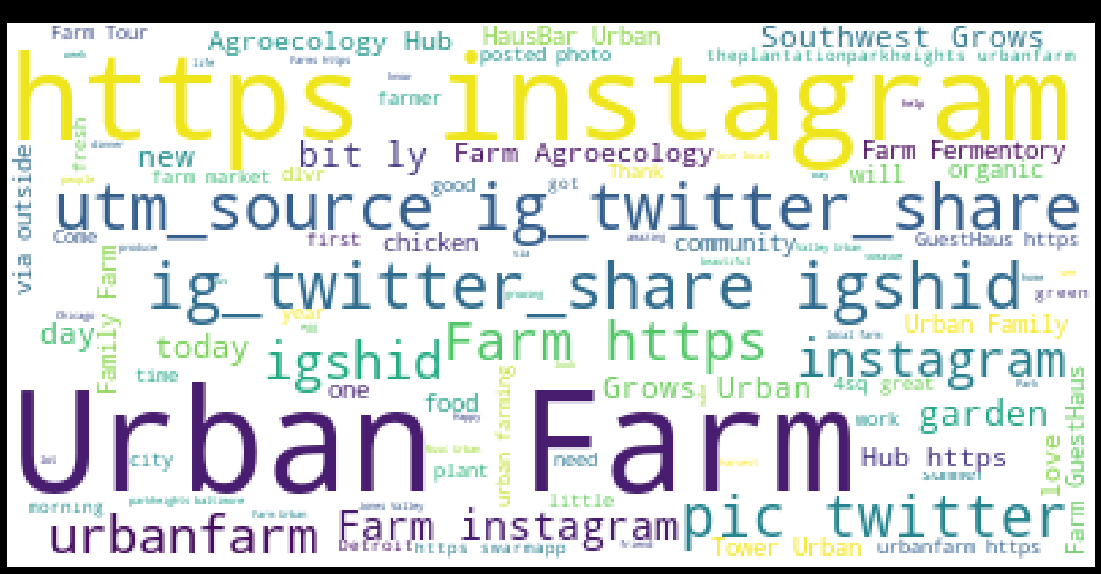

In [25]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
wordcloud(mas,'tweet') 

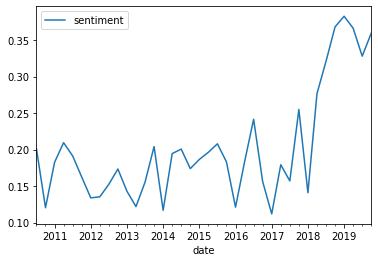

In [22]:
mas['2019-12-31':].resample('Q').mean().plot()

How much cleaning do I need to do for VADER analysis? Seems to work fine, and not much documentation on how to clean. Since VADER was made specifically to analyze social media blurbs with built in processing for certain punctuation and emojis, it seems that cleaning is not necessary. Maybe removing usernames and other irrelevant info would be good, though..

In [34]:
urban_farms = mas.copy()

In [35]:
urban_farms['tweet'][0]

'There are over 50 urban farms in the metro Atlanta area and plenty of ways you can support their valuable efforts. Here are our top 3! \n\n1. Shop at your local farmers market. 🧑\u200d🌾\n2. Buy local produce online. 🥬\n3.…  https://www.instagram.com/p/CAJS-LTJ3zi/?igshid=1jizb8ie2p4mc\xa0…'

In [51]:
import re

In [43]:
clean_tweets = []
for tweet in urban_farms['tweet']:
    clean_tweets.append(re.sub(r"http\S+", "", tweet))


In [46]:
more_cleam = []
for tweet in clean_tweets:
    more_cleam.append(re.sub(r"pic.","", tweet))

In [49]:
len(clean_tweets)

8194

In [50]:
len(more_cleam)

8194